# Лабораторная работа №3.5.1
## Выполнил Усеинов Булат Рустэмович
### 778 группа


In [52]:
import numpy as np
from scipy import interpolate
import pandas as pd
from matplotlib import pyplot as plt

In [53]:
def find_min_der(x, y):
    k_min = np.inf
    for i in range(len(x) - 1):
        k = (y[i+1] - y[i])/(x[i+1] - x[i])
        if k < k_min:
            k_min = k
            b = (y[i]*x[i + 1]-y[i + 1]*x[i])/(x[i + 1]-x[i])
            delta_x = (2 * (0.03 ** 2)) ** 0.5
            delta_y = (2 * (0.03 ** 2)) ** 0.5
            delta_k = k * ((delta_y/y[i+1]) ** 2 + (delta_x/(x[i+1]))**2 ) ** 0.5
    return k_min, b, delta_k

In [54]:
#измерим напряжение зажигания разряда
DF = pd.DataFrame()
DF["U, V"] = [175.61, 174.18, 173.91, 180.10, 184.90, 194.16, 191.02]
DF["deltaU, V"] = DF["U, V"] - DF["U, V"].mean()
print ("Напряжение зажигания заряда U = (%.02f ± %.02f) V" % (DF["U, V"].mean(),
                                    ((DF["deltaU, V"] ** 2).sum()/(len(DF['U, V']) * (len(DF["U, V"]) - 1))) ** 0.5))

Напряжение зажигания заряда U = (181.98 ± 3.12) V


## Часть I.  ВАХ Разряда

In [55]:
#снимем ВАХ неонового разряда 
data = pd.DataFrame()
data["U(forward), V"] = [34.64, 33.62, 33.02, 32.49, 31.65, 29.48, 27.86, 25.38, 24.14, 23.09, 22.13,
                            21.35, 20.77, 20.42, 20.07, 19.75, 19.45, 19.24, 19.14, 19.06, 19.00, 18.92, 18.78, 18.67]
data["deltaU(f), V"] = 0.03
data["U(backward), V"] = [34.66, 33.63, 33.01, 32.49, 31.66, 29.47, 27.32, 25.15, 23.91, 22.98, 21.85,
                            21.08, 20.65, 20.25, 19.80, 19.60, 19.24, 19.11, 18.96, 18.90, 18.87, 18.78, 18.72, 18.67]
data["deltaU(b), V"] = 0.03
data["U(avg), V"] = (data["U(forward), V"] + data["U(backward), V"]) / 2
data["deltaU(avg), V"] = 1/2*(2 * 0.03 ** 2) ** 0.5
data['I, mA'] = [0.50, 0.70, 0.9, 1.1, 1.3, 1.5, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6,
                                                                                    3.8, 4.0, 4.2, 4.4, 4.6, 4.8, 5.0]
data["deltaI, mA"] = 0.03

data

,"U(forward), V","deltaU(f), V","U(backward), V","deltaU(b), V","U(avg), V","deltaU(avg), V","I, mA","deltaI, mA"
0,34.64,0.03,34.66,0.03,34.650,0.021213,0.5,0.03
1,33.62,0.03,33.63,0.03,33.625,0.021213,0.7,0.03
2,33.02,0.03,33.01,0.03,33.015,0.021213,0.9,0.03
3,32.49,0.03,32.49,0.03,32.490,0.021213,1.1,0.03
4,31.65,0.03,31.66,0.03,31.655,0.021213,1.3,0.03
5,29.48,0.03,29.47,0.03,29.475,0.021213,1.5,0.03
6,27.86,0.03,27.32,0.03,27.590,0.021213,1.6,0.03
7,25.38,0.03,25.15,0.03,25.265,0.021213,1.8,0.03
8,24.14,0.03,23.91,0.03,24.025,0.021213,2.0,0.03
9,23.09,0.03,22.98,0.03,23.035,0.021213,2.2,0.03


Rmax = (-18.85 ± 0.50) *10^3 Ом


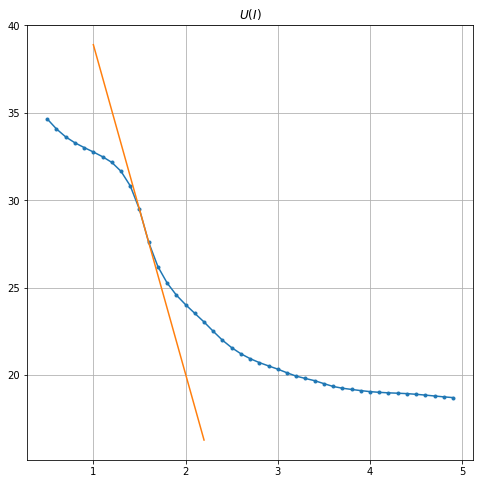

In [56]:
f = interpolate.interp1d(data['I, mA'], data['U(avg), V'], kind='quadratic')
xnew = np.arange(0.5, 5, 0.1)
ynew = f(xnew)
k, b, delta_k= find_min_der(xnew, ynew)
print ("Rmax = (%.02f ± %0.02f) *10^3 Ом"% (k, abs(delta_k)))
plt.figure(figsize=(8,8))
plt.plot(xnew, ynew, '.-')
plt.plot([1, 2.2],[k + b, 2.2*k + b])
plt.title(r"$U(I)$")
plt.grid()

# Часть II. Зондовые характеристики

In [57]:
data_zond = pd.DataFrame([25, 22, 19, 16, 13, 10, 8, 6, 5, 4, 3, 2, 1.5, 1.0, 0.5, -0.5, -1.0, -1.5, -2, -3, -4,
                          -5, -6, -8, -10, -13, -16, -19, -22, -25], columns=['U, V'])
data_zond["deltaU, V"] = 0.03
data_zond["I = 5mA"] = [86.42, 87.42, 85.90, 82.86, 77.17, 66.72, 56.29, 42.19, 34.04, 25.35, 15.35, 4.93, -0.44,
                        -5.68, -11.05, -13.43, -16.35, -18.99, -29.76, -39.49, -48.53, -57.91, -64.13,
                        -77.72, -86.89, -97.74, -103.74, -107.28, -109.09, -108.71]
data_zond["I = 3mA"] = [51.65, 50.07, 48.37, 46.65, 44.13, 39.63, 34.07, 26.19, 21.30, 15.53, 9.40, 2.85, -0.49,
                        -4.01, -10.03, -12.35, -15.82, -18.89, -22.16, -28.40, -34.03, -39.35, -43.82,
                        -50.97, -55.91, -60.58, -63.33, -65.45, -67.60, -69.66]
data_zond["I = 1.5mA"] = [23.76, 23.03, 22.34, 21.62, 20.70, 18.84, 16.32, 12.66, 10.27, 7.60, 4.33, 1.23, -0.84,
                          -2.56, -4.27, -7.64, -9.28, -11.11, -12.79, -16.00, -18.86, -21.31, -23.50,
                          -26.83, -29.11, -31.15, -32.50, -33.72, -35.01, -36.30]
data_zond["deltaI, mA"] = 0.03
data_zond

,"U, V","deltaU, V",I = 5mA,I = 3mA,I = 1.5mA,"deltaI, mA"
0,25.0,0.03,86.42,51.65,23.76,0.03
1,22.0,0.03,87.42,50.07,23.03,0.03
2,19.0,0.03,85.90,48.37,22.34,0.03
3,16.0,0.03,82.86,46.65,21.62,0.03
4,13.0,0.03,77.17,44.13,20.70,0.03
5,10.0,0.03,66.72,39.63,18.84,0.03
6,8.0,0.03,56.29,34.07,16.32,0.03
7,6.0,0.03,42.19,26.19,12.66,0.03
8,5.0,0.03,34.04,21.30,10.27,0.03
9,4.0,0.03,25.35,15.53,7.60,0.03


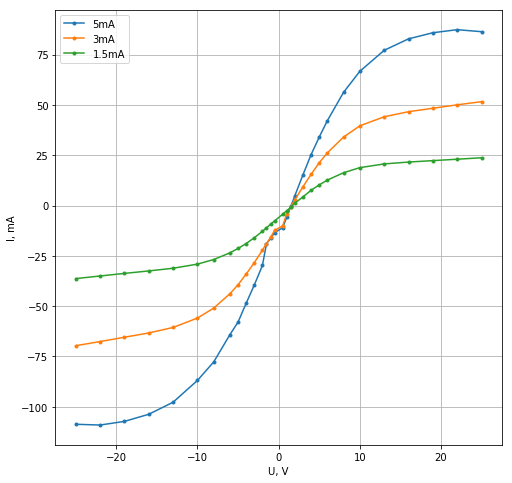

In [58]:
Ip = [5, 3, 1.5]
plt.figure(figsize=(8,8))
plt.plot(data_zond["U, V"], data_zond["I = 5mA"], '.-', label='5mA')
plt.plot(data_zond["U, V"], data_zond["I = 3mA"], '.-', label='3mA')
plt.plot(data_zond["U, V"], data_zond["I = 1.5mA"], '.-', label='1.5mA')
plt.xlabel("U, V")
plt.ylabel("I, mA")
plt.legend()
plt.grid()

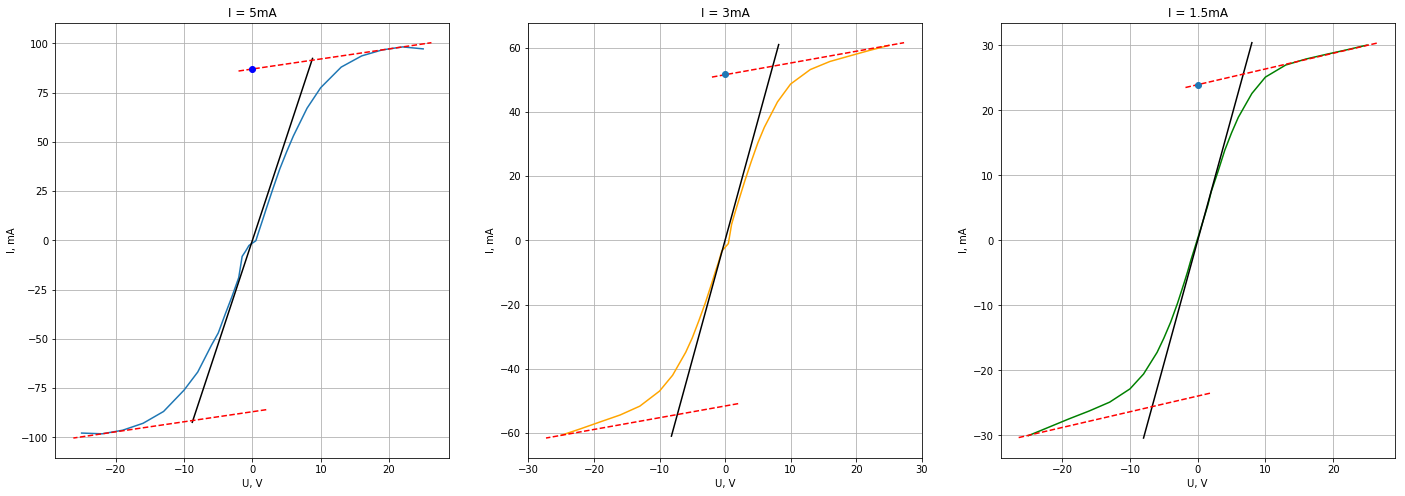

In [59]:
plt.figure(figsize=(24,8))
plt.subplot(131)
plt.plot(data_zond["U, V"], data_zond["I = 5mA"] + (-data_zond["I = 5mA"][1] - data_zond["I = 5mA"][28])/2)
plt.plot([-8.8, 8.8], [-92.4, 92.4], 'black')
plt.plot([-2.029, 26.206], [86, 100.4], 'r--')
plt.plot([2.029, -26.206], [-86, -100.4], 'r--')
plt.plot([0], [87.017], 'ob')

plt.xlabel("U, V")
plt.ylabel("I, mA")
plt.title("I = 5mA")
plt.grid()
plt.subplot(132)
plt.plot(data_zond["U, V"], data_zond["I = 3mA"] + (-data_zond["I = 3mA"][0] - data_zond["I = 3mA"][29])/2, 'orange')
plt.plot([-9/1.1, 9/1.1], [-67/1.1, 67/1.1], 'black')
plt.plot([-2, 27.315], [50.8, 61.5], 'r--')
plt.plot([2, -27.315], [-50.8, -61.5], 'r--')
plt.plot([0], [51.685], 'o')
plt.xlabel("U, V")
plt.ylabel("I, mA")
plt.title("I = 3mA")
plt.grid()
plt.subplot(133)
plt.plot(data_zond["U, V"], data_zond["I = 1.5mA"] + (-data_zond["I = 1.5mA"][0] - data_zond["I = 1.5mA"][29])/2, 'g')
plt.plot([-8, 8], [-30.4, 30.4], 'black')
plt.plot([26.439, -2.045], [30.33, 23.45], 'r--')
plt.plot([-26.439, 2.045], [-30.33, -23.45], 'r--')
plt.plot([0], [23.948], 'o')
plt.xlabel("U, V")
plt.ylabel("I, mA")
plt.title("I = 1.5mA")
plt.grid()

In [60]:
# k_In = np.array([0.51, 0.365, 0.243])
# y_k_In = [1.81, 2.06, 1.29]
# x_k_In = 22
# delta_kx = 22 * k_In * (((2 * (0.03 ** 2)) ** 0.5/np.array(y_k_In)) ** 2 + ((2 * (0.03 ** 2)) ** 0.5/x_k_In)**2 + (0.03/22)) ** 0.5
# delta_In = (delta_kx ** 2 + 0.03**2) ** 0.5

Расчитаем энергию электронов в электрон-вольтах:
$$kT_e=\frac{1}{2}\frac{eI_{iн}}{\frac{dI}{dU}|_{U=0}}$$

Расчитаем концентрацию электронов по формуле:

$$I_{iн} = 0.4n_eeS\sqrt{\frac{2kT_e}{m_i}}$$

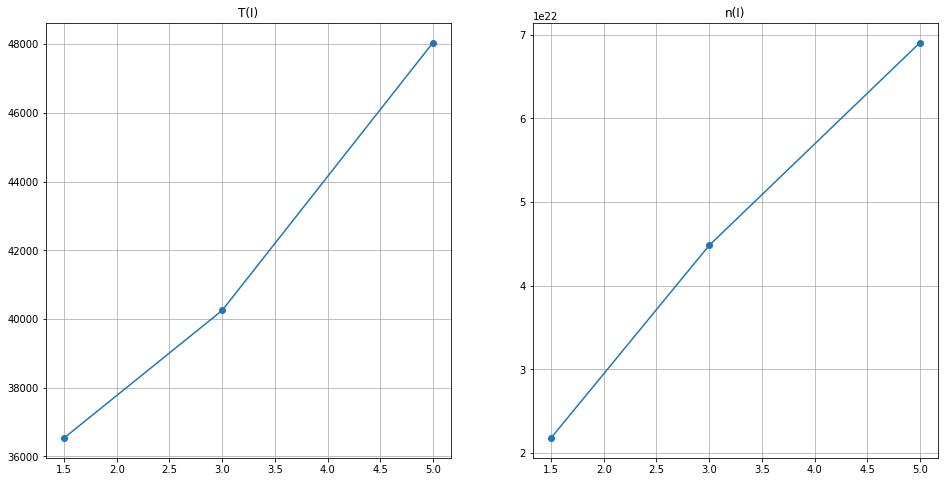

In [61]:
In = np.array([87.017, 51.685, 23.948])
Ks = np.array([92.4/8.8, 67/9, 30.4/8])
delta_Ks = Ks * (((2 * (0.03 ** 2)) ** 0.5/y_1) ** 2 + ((2 * (0.03 ** 2)) ** 0.5/x_1)**2) ** 0.5
d = 2e-4
l = 5.2e-3
mi = 22 * 1.66e-27
k_b = 1.38e-23
e = 1.6e-19
kTe = 0.5 * In / Ks * e #в джоулях
delta_kTe = kTe * ((delta_In/In) ** 2 + (delta_Ks/Ks) ** 2) ** 0.5
kTe_2  = kTe/e #в электрон-вольтах
Te = kTe/k_b

ne = In/(0.4 * e * np.pi * d * l * (2*kTe/mi) ** 0.5) 
delta_ne = ne * ((delta_In/In) ** 2 + (delta_kTe/(2*kTe)) ** 2) ** 0.5
ne_res = ne/ 1e6
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.plot(Ip, Te, 'o-')
plt.title('T(I)')
plt.grid()

plt.subplot(122)
plt.plot(Ip, ne, 'o-')
plt.title('n(I)')
plt.grid()

In [62]:
print (delta_ne/ne * 100)

[0.72548558 0.91090569 1.6642715 ]


Расчитаем плазменную частоту колебаний по формуле:
$$\omega_p = \sqrt{\frac{n_e e^2}{\varepsilon_0 m_e}}$$

Расчитаем дебаевский радиус по формуле: 
$$r_d = \sqrt{\frac{kT_i}{4\pi ne^2}}$$

In [63]:
### расчет плазменной частоты колебаний 
eps_0 = 8.85418782e-12
me = 9.109e-31
Ti = 300 #температура ионов
Ws = (ne * e ** 2 / (eps_0 * me)) ** 0.5
delta_Ws = Ws * delta_ne/(2* ne)
print ((delta_Ws/Ws)  * 100)
print ("Плазменная частота колебаний: ", Ws)

#расчет дебаевского радиуса

r = (k_b * Ti/(4 * np.pi * ne * e**2)) ** 0.5
delta_r = r * 0.5 / ne * delta_ne
print (delta_r/r * 100)
print ("Дебаебский радиус: ", r)

#расчет среднего числа ионов в дебаевской сфере

N = 4/3 * ne * np.pi* r ** 3
delta_N = N * ((3 * delta_r/r) ** 2 + (delta_ne/ne) ** 2) ** 0.5
print (delta_N/N * 100)
print ("Среднее число ионов в дебаевской сфере: ", N)

[0.36274279 0.45545285 0.83213575]
Плазменная частота колебаний:  [1.48057265e+13 1.19269823e+13 8.31753394e+12]
[0.36274279 0.45545285 0.83213575]
Дебаебский радиус:  [0.00043167 0.00053586 0.00076841]
[1.30788772 1.64215859 3.00030811]
Среднее число ионов в дебаевской сфере:  [2.32699217e+13 2.88864432e+13 4.14219044e+13]


In [64]:
#степень ионизации 

P = 100 #давление в трубке
n_0 = P / (k_b * Ti)
alpha = ne_res / n_0
Na = 6.02e23 #число Авогадро
V = 22.4e-3 #молярный объем(м^3)
delta_alpha = alpha * delta_N/N

In [65]:
res = pd.DataFrame()
res["Rmax, Ом"] = [abs(k)* 1e3] * 3
res["delta_Rmax, Ом"] = delta_k
res["Ip, мА"] = Ip
res["delta_Ip, мА"] = delta_In
res["kTe, эВ"] = kTe_2
res["delta_kTe, эВ"] = delta_kTe/e
res["ne, см-3"] = ne_res
res["delta_ne, см-3"] = delta_ne/1e6
res["Wp, c-1"] = Ws
res["delta_Wp, c-1"] = delta_Ws
res["r_d, см"] = r * 100
res["delta_r, см"] = delta_r * 100
res["N_d"] = N
res["delta_N"] = delta_N
res["alpha"] = alpha
res["delta_alpha"] = delta_alpha
res

,"Rmax, Ом","delta_Rmax, Ом","Ip, мА","delta_Ip, мА","kTe, эВ","delta_kTe, эВ","ne, см-3","delta_ne, см-3","Wp, c-1","delta_Wp, c-1","r_d, см","delta_r, см",N_d,delta_N,alpha,delta_alpha
0,18850.0,-0.500676,5.0,0.492140,4.143667,0.037656,6.906196e+16,5.010346e+14,1.480573e+13,5.370670e+10,0.043167,0.000157,2.326992e+13,3.043444e+11,2.859165e-06,3.739467e-08
1,18850.0,-0.500676,3.0,0.341202,3.471381,0.043576,4.481678e+16,4.082386e+14,1.192698e+13,5.432178e+10,0.053586,0.000244,2.888644e+13,4.743612e+11,1.855415e-06,3.046885e-08
2,18850.0,-0.500676,1.5,0.266256,3.151053,0.078046,2.179559e+16,3.627378e+14,8.317534e+12,6.921317e+10,0.076841,0.000639,4.142190e+13,1.242785e+12,9.023374e-07,2.707290e-08


$\Delta (I) = 0.03 mA$

$\Delta (U) = 0.03 V$

$\Delta(kT_e) = kT_e \cdot \sqrt{(\frac{\Delta(I_{i\text{н}})}{I_{i\text{н}}})^2 + (\frac{\Delta(\frac{dI}{dU})}{\frac{dI}{dU}})^2}$
 
$\Delta (\sqrt{kT_e}) =\frac{\Delta(kTe)}{2\sqrt{kTe}}$ 
 
$\Delta(n_e) = n_e \cdot \sqrt{(\frac{\Delta I_{iн}} {I_{iн}})^2 + (\frac{\Delta(\sqrt{kTe}}{\sqrt{kTe}})^2}$
   
$\Delta (\omega_p) = \omega_p \cdot \frac{\Delta(n_e)}{2n_e}$
$r_D = \sqrt{\frac{kT_i}{4\pi ne^2}}$

$\Delta r_D = \sqrt{\frac{kT_i}{4 \pi e^2}} \cdot \Delta (\frac{1}{\sqrt{n}})
= \sqrt{\frac{kT_i}{4 \pi e^2}} \cdot \frac{1}{2} n^{-\frac{3}{2}} \cdot \Delta (n)$


$\Delta (N_D) = N_D \cdot \sqrt{(\frac{3r_D^2 \cdot \Delta r_D}{r_D^3})^2 + (\frac {\Delta n_i}{n_i} )^2}$